#### This is a Deep Learning Project about breast cancer classification with Neural Network (NN)

## A BRIEF EXPLANATION OF THE FULL CODE IN THIS NOTEBOOK: 

#### I built a breast cancer classification system using a neural network model in Python with the TensorFlow and Keras libraries. I began by loading the breast cancer dataset from sklearn.datasets, converting it into a dataframe, and adding the target labels. I explored the dataset through head(), info(), and describe() to understand its structure and ensure there were no missing values. I examined the class distribution to check for imbalance between malignant and benign cases(but didnt make any changes to it because it was not a huge imbalanced). After splitting the dataset into features and labels, I performed a stratified train-test split to preserve label proportions and standardized the data using StandardScaler for consistent scaling. I designed a sequential neural network with one hidden layer using Relu activation and an output layer with sigmoid activation. The model was compiled with the Adam optimizer and trained for 10 epochs while monitoring accuracy and loss on both training and validation sets. The results showed a high validation accuracy 93.4% and low validation loss, indicating strong model performance. I evaluated the final model on the test set, achieving an accuracy of 96.5%. To make the system interactive, I built a predictive function that accepts new input data, reshapes and standardizes it, predicts the output using the trained model, and prints whether the tumor is malignant or benign along with confidence scores for each class. The system was successfully tested on multiple inputs (i opened the breast cancer dataset in notepad and tested multiple the system i created with multiple inputs), providing accurate class predictions and probabilities.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

#### Data Collection and Preprocessing

In [4]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [5]:
df = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df['label'] = breast_cancer_dataset.target

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
df.shape

(569, 31)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [12]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [13]:
# checking the distribution of target variable that is, how many values are there for benign case and malignant case; BENIGN= 1, MALIGNANT=0
# we usually do this value counts purposely to check if there is an imbalance, and if there is a huge imbalance like B = 10000, M = 2000 
#then we have to sample the data (undersampling) 
df['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [14]:
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [15]:
# separating data into features and targets
X = df.drop(columns = 'label', axis = 1)
Y = df['label']

In [16]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [17]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


In [18]:
#splittling the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=2)

In [19]:
print(X.shape, x_train.shape, x_test.shape)

(569, 30) (455, 30) (114, 30)


#### Standardize the data

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [24]:
print(x_train_std)

[[ 1.94029252  0.85536022  1.81300604 ...  1.30477202 -0.10637168
  -0.43949769]
 [-0.54671184 -1.21003611 -0.59777015 ... -1.44505823 -0.95211319
  -1.26923392]
 [-0.73503734 -0.20269437 -0.75741621 ... -0.73762301 -0.23746961
  -1.01847415]
 ...
 [-0.57994575 -0.09896353 -0.62149589 ... -0.9563972  -0.01364388
  -0.12911281]
 [ 0.54723774  0.31134958  0.64280442 ...  1.40126787  1.30692792
   1.73041024]
 [ 0.53062078  0.07392121  0.48195196 ...  0.56748339 -0.38135758
  -1.07419854]]


#### We would now be training this neural network with the breast cancer data

In [26]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [27]:
# setting up the layers of my neural network
model = keras.Sequential([
                         keras.layers.Flatten(input_shape=(30,)),
                         keras.layers.Dense(20, activation='relu'),
                         keras.layers.Dense(2, activation='sigmoid')
])

C:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
#compiling the Neural Network
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [29]:
#training the neural network
history = model.fit(x_train_std, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4358 - loss: 0.7862 - val_accuracy: 0.7826 - val_loss: 0.6001
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7758 - loss: 0.5249 - val_accuracy: 0.8696 - val_loss: 0.4207
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8565 - loss: 0.3867 - val_accuracy: 0.8913 - val_loss: 0.3270
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9005 - loss: 0.3125 - val_accuracy: 0.8913 - val_loss: 0.2718
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9108 - loss: 0.2673 - val_accuracy: 0.9130 - val_loss: 0.2358
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9229 - loss: 0.2368 - val_accuracy: 0.9130 - val_loss: 0.2095
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9251 - loss: 0.2137 - val_accuracy: 0.9348 - val_loss: 0.1888
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9372 - loss: 0.1950 - val_accuracy: 0.9348 - val_loss

#### visualizing the accuracy and loss

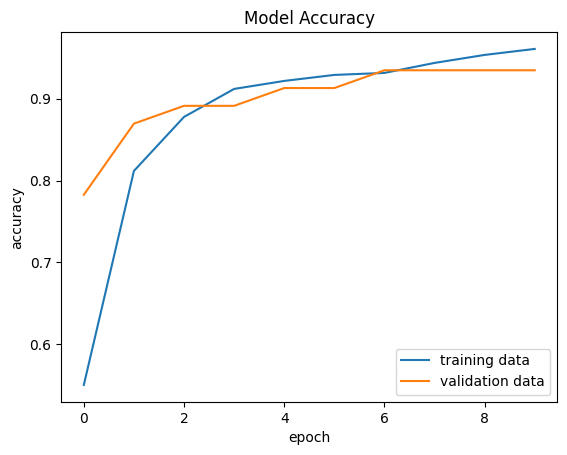

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

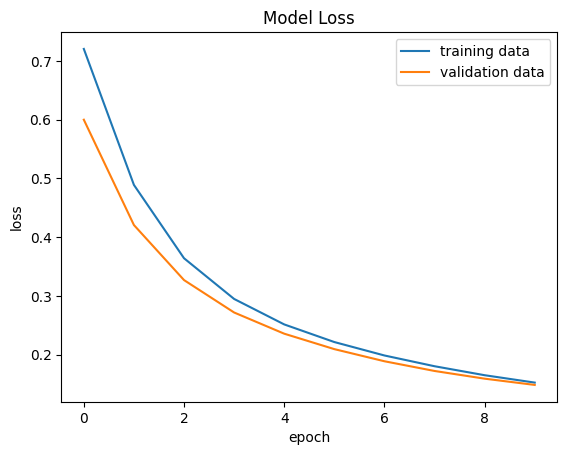

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

#### Get the Accuracy of the model on test data

In [34]:
loss, accuracy =model.evaluate(x_test_std, y_test)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9651 - loss: 0.1193 
0.9649122953414917


In [35]:
print(x_test_std.shape)
print(x_test_std[0])

(114, 30)
[ 0.44199702  0.212229    0.42163229  0.28029849  0.46059068  0.31923771
  0.32738868  0.3980721   0.45467963  0.05268291 -0.22649032 -0.56019683
 -0.32014237 -0.19125366 -0.76043663 -0.08046584 -0.26006979 -0.51214349
 -0.33901861 -0.23280218  0.65164049  0.74215747  0.53471259  0.33156671
  1.02726691  1.30534397  0.62768506  0.50566574  1.76577066  1.29575996]


In [36]:
y_pred = model.predict(x_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [37]:
print(y_pred.shape)
print(y_pred[0])

(114, 2)
[0.86237943 0.333742  ]


In [38]:
print(x_test_std)

[[ 0.44199702  0.212229    0.42163229 ...  0.50566574  1.76577066
   1.29575996]
 [-0.40269822 -1.65031591 -0.45179655 ... -0.4843214  -0.18151318
   0.64044108]
 [-0.26422359 -0.43781762 -0.32110392 ... -0.9749425  -0.19430322
  -0.6222737 ]
 ...
 [ 0.20659015  0.7377986   0.40152573 ...  2.00738244 -0.03602646
   1.80285195]
 [ 1.56087203  1.33482723  1.53955686 ...  0.88712591  0.66582708
   0.08375438]
 [-0.64918307 -0.44703814 -0.67739211 ... -1.07505695  0.49795778
  -0.96887944]]


In [39]:
print(y_pred)

[[0.86237943 0.333742  ]
 [0.1851604  0.9439751 ]
 [0.15596712 0.91747487]
 [0.19336869 0.91545194]
 [0.14704603 0.5789201 ]
 [0.29651317 0.47721055]
 [0.23682883 0.96589506]
 [0.2932508  0.86731744]
 [0.3193237  0.9209795 ]
 [0.23503456 0.9366637 ]
 [0.8846625  0.2735068 ]
 [0.8339302  0.6166716 ]
 [0.1977096  0.91964066]
 [0.33781898 0.6937952 ]
 [0.9282954  0.22304472]
 [0.592024   0.58952636]
 [0.2392278  0.9619261 ]
 [0.10897327 0.8412507 ]
 [0.23628257 0.7945332 ]
 [0.35765538 0.5820514 ]
 [0.72645736 0.6494751 ]
 [0.75710464 0.2172782 ]
 [0.89493793 0.29067785]
 [0.25532925 0.8497157 ]
 [0.49895692 0.7690715 ]
 [0.2353204  0.8912083 ]
 [0.7468622  0.3789323 ]
 [0.93678254 0.26204622]
 [0.26087388 0.7301985 ]
 [0.21253243 0.8632004 ]
 [0.11583751 0.7779519 ]
 [0.24590786 0.90878445]
 [0.298969   0.81362027]
 [0.45594686 0.7141775 ]
 [0.31658468 0.92058283]
 [0.9845688  0.11045513]
 [0.8377375  0.32588756]
 [0.24677129 0.9481447 ]
 [0.9757442  0.08298051]
 [0.8988687  0.16269073]


#### model.predict() gives the prediction probability of each class for that data point

In [41]:
#argmax would tell us the highest value among each list
#converting the prediction probability to class labels
y_pred_labels = [int(np.argmax(i)) for i in y_pred]
print(y_pred_labels)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1]


# Building the predictive system 

In [43]:
input_data = (20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956,0.1238,0.1866,
              0.2416,0.186,0.275,0.08902
)

#i changed the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#i reshaped the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

#standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = int(np.argmax(prediction[0]))
print(prediction_label)

if (prediction_label == 0):
    print('The tumor is Malignant')
else:
    print('The tumor is Benign')
   

print(f"Malignant Confidence: {prediction[0][0]:.4f}")
print(f"Benign Confidence: {prediction[0][1]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[0.9101801  0.34527424]]
0
The tumor is Malignant
Malignant Confidence: 0.9102
Benign Confidence: 0.3453


C:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
input_data = (9.504,12.44,60.34,273.9,0.1024,0.06492,0.02956,0.02076,0.1815,0.06905,0.2773,0.9768,1.909,15.7,0.009606,0.01432,
              0.01985,0.01421,0.02027,0.002968,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.245,0.07773
)

#i changed the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#i reshaped the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

#standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = int(np.argmax(prediction[0]))
print(prediction_label)

if (prediction_label == 0):
    print('The tumor is Malignant')
else:
    print('The tumor is Benign')

print(f"Malignant Confidence: {prediction[0][0]:.4f}")
print(f"Benign Confidence: {prediction[0][1]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[0.10305545 0.9820226 ]]
1
The tumor is Benign
Malignant Confidence: 0.1031
Benign Confidence: 0.9820


C:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
input_data = (17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,
              0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
)

#i changed the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#i reshaped the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

#standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = int(np.argmax(prediction[0]))
print(prediction_label)

if (prediction_label == 0):
    print('The tumor is Malignant')
else:
    print('The tumor is Benign')

print(f"Malignant Confidence: {prediction[0][0]:.4f}")
print(f"Benign Confidence: {prediction[0][1]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.9945309  0.19815354]]
0
The tumor is Malignant
Malignant Confidence: 0.9945
Benign Confidence: 0.1982


C:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [46]:
input_data = (11.31,19.04,71.8,394.1,0.08139,0.04701,0.03709,0.0223,0.1516,0.05667,0.2727,0.9429,1.831,18.15,0.009282,0.009216,
              0.02063,0.008965,0.02183,0.002146,12.33,23.84,78,466.7,0.129,0.09148,0.1444,0.06961,0.24,0.06641
)

#i changed the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#i reshaped the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

#standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = int(np.argmax(prediction[0]))
print(prediction_label)

if (prediction_label == 0):
    print('The tumor is Malignant')
else:
    print('The tumor is Benign')

print(f"Malignant Confidence: {prediction[0][0]:.4f}")
print(f"Benign Confidence: {prediction[0][1]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.1163196 0.9227689]]
1
The tumor is Benign
Malignant Confidence: 0.1163
Benign Confidence: 0.9228


C:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [101]:
def predict_tumor(input_data):
    
    input_data_as_numpy_array = np.array(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    
    # the standardized the input
    input_data_std = scaler.transform(input_data_reshaped)
    
    # making a prediction
    prediction = model.predict(input_data_std)
    prediction_label = int(np.argmax(prediction[0]))
    
    # now this is the output result and confidence
    tumor_type = "Malignant" if prediction_label == 0 else "Benign"
    confidence_malignant = prediction[0][0]
    confidence_benign = prediction[0][1]
    
    print(f"The tumor is {tumor_type}")
    print(f"Malignant Confidence: {confidence_malignant:.4f}")
    print(f"Benign Confidence: {confidence_benign:.4f}")
    
    return prediction_label, confidence_malignant, confidence_benign


In [103]:
predict_tumor([11.31,19.04,71.8,394.1,0.08139,0.04701,0.03709,0.0223,0.1516,0.05667,0.2727,0.9429,1.831,18.15,0.009282,0.009216,
              0.02063,0.008965,0.02183,0.002146,12.33,23.84,78,466.7,0.129,0.09148,0.1444,0.06961,0.24,0.06641])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The tumor is Benign
Malignant Confidence: 0.1163
Benign Confidence: 0.9228


C:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(1, np.float32(0.1163196), np.float32(0.9227689))

In [105]:
predict_tumor([17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,
              0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
The tumor is Malignant
Malignant Confidence: 0.9945
Benign Confidence: 0.1982


C:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(0, np.float32(0.9945309), np.float32(0.19815354))